In [50]:
# Get runs from 
import pandas as pd
runs = pd.read_excel("runs.xlsx", parse_dates = ["Date"])
runs

,Date,Name,Tiles,New Tiles,Moving time,Elapsed time,Average,Distance (m),Elevation (m),Type,Commute,Trainer,Max heartrate,Avg heartrate,Start Lat,Start Long,Gear
0,2023-08-21 18:18:51,Evening Run,4,1,4381,4684,9.8208,11951.2,32.8,Run,0,0,0,0.0,51.5554,-0.080556,NaN
1,2023-08-17 18:30:22,Evening Run,4,0,2312,2868,9.7596,6267.5,23.8,Run,0,0,0,0.0,51.5554,-0.080529,NaN
2,2023-08-14 17:15:33,Evening Run,4,0,3305,4100,10.7172,9839.3,43.2,Run,0,0,0,0.0,51.5554,-0.080523,NaN
3,2023-08-11 20:19:00,Evening Run,4,0,3358,3435,8.9352,8335.1,59.0,Run,0,0,190,160.7,43.7695,4.121180,NaN
4,2023-08-09 20:20:32,Evening Run,2,0,1692,2560,9.3744,4405.5,66.9,Run,0,0,0,0.0,43.7694,4.121110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2017-04-23 19:01:35,Evening Run,4,0,2899,2948,10.6128,8547.3,17.8,Run,0,0,0,0.0,52.2080,0.119659,NaN
198,2017-03-06 18:35:40,Evening Run,4,3,2950,2972,11.3328,9287.6,12.0,Run,0,0,0,0.0,52.2080,0.119585,NaN
199,2017-02-14 19:15:36,Evening Run,4,0,3166,3286,9.9144,8717.6,17.7,Run,0,0,0,0.0,52.2079,0.119709,NaN
200,2017-01-30 19:10:27,Evening Run,4,0,3059,3172,10.1196,8598.0,17.7,Run,0,0,0,0.0,52.2081,0.119615,NaN


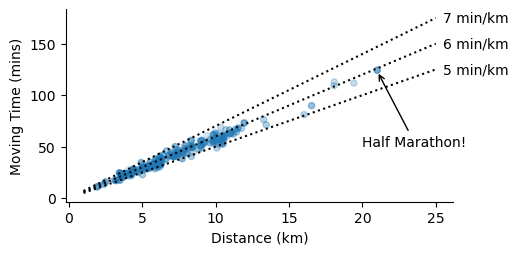

In [51]:
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime

def fade_out_by_date(dates, low = None, high = None):
    low, high = low or min(dates), high or max(dates)
    range = (high - low)
    return (dates - low) / range

f, ax = plt.subplots(figsize = (5,2.5))
ax.set(ylabel = "Moving Time (mins)", xlabel = "Distance (km)")

x = runs["Distance (m)"].values/1e3
y = runs["Moving time"].values/60

dists = np.linspace(1, 25, 2)
for i in [5,6,7]:
    mins_per_km = i * dists
    ax.plot(dists, mins_per_km, color = "black", linestyle = "dotted", label = f"{i} min/km")
    ax.text(25.5, 25*i, f"{i} min/km", va = "center")

i = runs["Distance (m)"].argmax()
ax.annotate("Half Marathon!", (x[i], y[i]-1), (20, 50), arrowprops = dict(arrowstyle = "->"))

ax.scatter(x, y, s=20, alpha = 0.6*fade_out_by_date(runs["Date"]))
ax.spines[['right', 'top']].set_visible(False)
f.savefig("time_vs_distance.svg", transparent=True)
f.savefig("time_vs_distance.png", transparent=True)

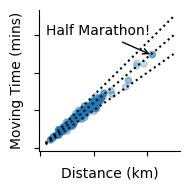

In [68]:
runs = pd.read_excel("runs.xlsx", parse_dates = ["Date"])
f, ax = plt.subplots(figsize = (2,2))
ax.set(ylabel = "Moving Time (mins)", xlabel = "Distance (km)")

x = runs["Distance (m)"].values/1e3
y = runs["Moving time"].values/60

dists = np.linspace(1, 25, 2)
for i in [5,6,7]:
    mins_per_km = i * dists
    ax.plot(dists, mins_per_km, color = "black", linestyle = "dotted", label = f"{i} min/km")
    # ax.text(25.5, 25*i, f"{i} min/km", va = "center")

i = runs["Distance (m)"].argmax()
ax.annotate("Half Marathon!", (x[i], y[i]-1), (1, 150), arrowprops = dict(arrowstyle = "->"))

ax.scatter(x, y, s=20, alpha = 0.6*fade_out_by_date(runs["Date"]))
ax.spines[['right', 'top']].set_visible(False)
ax.set(xticklabels = [], yticklabels = [])
f.tight_layout()
f.savefig("half_thumbnail.svg", transparent=True)

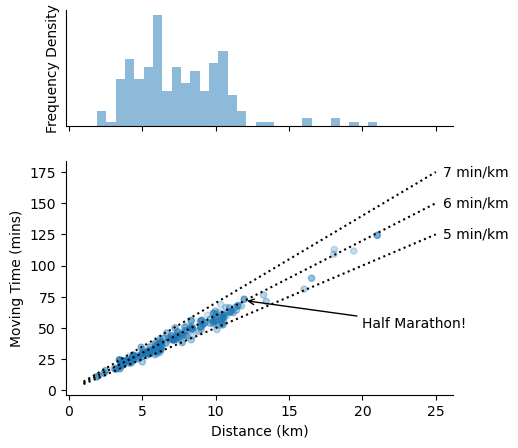

In [53]:
f, (ax2, ax) = plt.subplots(nrows=2, figsize = (5,5), sharex = True,
                           gridspec_kw = dict(height_ratios = (1,2)))

ax.set(ylabel = "Moving Time (mins)", xlabel = "Distance (km)")

x = runs["Distance (m)"].values/1e3
y = runs["Moving time"].values/60

dists = np.linspace(1, 25, 2)
for i in [5,6,7]:
    mins_per_km = i * dists
    ax.plot(dists, mins_per_km, color = "black", linestyle = "dotted", label = f"{i} min/km")
    ax.text(25.5, 25*i, f"{i} min/km", va = "center")

ax.annotate("Half Marathon!", (x[0], y[0]-1), (20, 50), arrowprops = dict(arrowstyle = "->"))

ax.scatter(x, y, s=20, alpha = 0.6*fade_out_by_date(runs["Date"]))
for a in [ax, ax2]: a.spines[['right', 'top']].set_visible(False)

ax2.hist(x, bins = 30, alpha = 0.5)
ax2.set(yticks=[], ylabel = "Frequency Density")

f.savefig("time_vs_distance_plus_hist.svg", transparent=True)

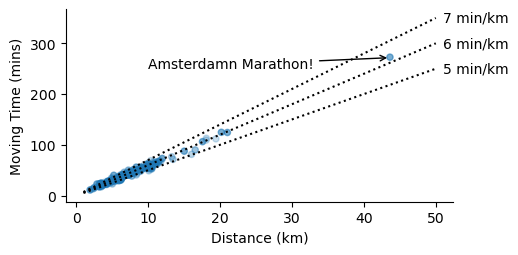

In [54]:
import pandas as pd
runs = pd.read_excel("runs_2.xlsx", parse_dates = ["Date"])

def fade_out_by_date(dates, low = None, high = None):
    low, high = low or min(dates), high or max(dates)
    range = (high - low)
    return (dates - low) / range

f, ax = plt.subplots(figsize = (5,2.5))
ax.set(ylabel = "Moving Time (mins)", xlabel = "Distance (km)")

x = runs["Distance (m)"].values/1e3
y = runs["Moving time"].values/60

dists = np.linspace(1, 50, 2)
for i in [5,6,7]:
    mins_per_km = i * dists
    ax.plot(dists, mins_per_km, color = "black", linestyle = "dotted", label = f"{i} min/km")
    ax.text(51, 50*i, f"{i} min/km", va = "center")

i = runs["Distance (m)"].argmax()
ax.annotate("Amsterdamn Marathon!", (x[i], y[i]-1), (10, 250), arrowprops = dict(arrowstyle = "->"))

ax.scatter(x, y, s=20, alpha = 0.6*fade_out_by_date(runs["Date"]))
ax.spines[['right', 'top']].set_visible(False)
f.savefig("time_vs_distance_2.svg", transparent=True)
f.savefig("time_vs_distance_2.png", transparent=True)

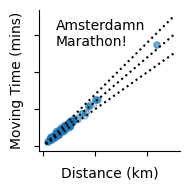

In [67]:
runs = pd.read_excel("runs_2.xlsx", parse_dates = ["Date"])

def fade_out_by_date(dates, low = None, high = None):
    low, high = low or min(dates), high or max(dates)
    range = (high - low)
    return (dates - low) / range

f, ax = plt.subplots(figsize = (2,2))
ax.set(ylabel = "Moving Time (mins)", xlabel = "Distance (km)")

x = runs["Distance (m)"].values/1e3
y = runs["Moving time"].values/60

dists = np.linspace(1, 50, 2)
for i in [5,6,7]:
    mins_per_km = i * dists
    ax.plot(dists, mins_per_km, color = "black", linestyle = "dotted", label = f"{i} min/km")
    # ax.text(51, 50*i, f"{i} min/km", va = "center")

i = runs["Distance (m)"].argmax()
ax.annotate("Amsterdamn\nMarathon!", (x[i], y[i]-1), (5, 270))

ax.scatter(x, y, s=20, alpha = 0.6*fade_out_by_date(runs["Date"]))
ax.spines[['right', 'top']].set_visible(False)
ax.set(xticklabels = [], yticklabels = [])
f.tight_layout()
f.savefig("full_thumbnail.svg", transparent=True)

In [23]:
!garmindb_cli.py --all --download --import --analyze --latest

___Downloading Latest Data___
Traceback (most recent call last):
  File "/Users/math/micromamba/envs/iot_ingester/bin/garmindb_cli.py", line 358, in <module>
    main(sys.argv[1:])
  File "/Users/math/micromamba/envs/iot_ingester/bin/garmindb_cli.py", line 339, in main
    download_data(args.overwrite, args.latest, args.stats)
  File "/Users/math/micromamba/envs/iot_ingester/bin/garmindb_cli.py", line 112, in download_data
    if not download.login():
           ^^^^^^^^^^^^^^^^
  File "/Users/math/micromamba/envs/iot_ingester/lib/python3.11/site-packages/garmindb/download.py", line 178, in login
    self.display_name = self.user_prefs['displayName']
                        ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^
TypeError: 'NoneType' object is not subscriptable


In [7]:
from garmindb import ConfigManager
from garmindb.garmindb import MonitoringDb, Monitoring, MonitoringHeartRate
import datetime
import  numpy as np

start_ts = datetime.date.today() - datetime.timedelta(days = 30)
end_ts = datetime.date.today()

db_params = ConfigManager.get_db_params()
mon_db = MonitoringDb(db_params, False)
hr_data = MonitoringHeartRate.get_for_period(mon_db, start_ts, end_ts, MonitoringHeartRate)
data = Monitoring.get_for_period(mon_db, start_ts, end_ts, Monitoring)

time = np.array([entry.timestamp for entry in hr_data])
hr = np.array([entry.heart_rate for entry in hr_data])

In [8]:
time[0]

datetime.datetime(2023, 7, 27, 11, 36)

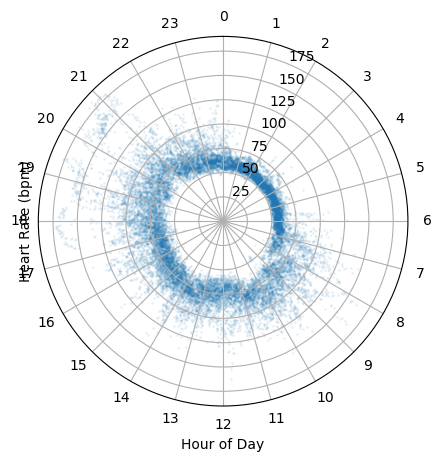

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

r = hr
theta = pd.Series(time).dt.hour +  pd.Series(time).dt.minute/60 \
                + pd.Series(time).dt.second/60**2

theta = theta / 24 * 2*np.pi

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, r, 1, alpha = 0.07)
ax.set(xticks = np.linspace(0,2*np.pi,24,endpoint=False), xticklabels = range(0,24))
ax.grid(True)
ax.set(xlabel = "Hour of Day", ylabel = "Heart Rate (bpm)")
ax.set_theta_direction("clockwise")
ax.set_theta_zero_location("N")

[Text(0.5, 0, 'Hour of Day'), Text(0, 0.5, 'Heart Rate (bpm)')]

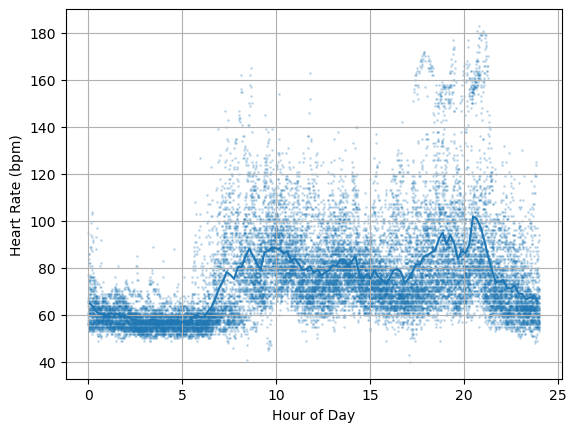

In [16]:
import scipy
hour = pd.Series(time).dt.hour +  pd.Series(time).dt.minute/60 \
                + pd.Series(time).dt.second/60**2

# theta = theta / 24 * 2*np.pi

bins = np.linspace(0,24,24 * 5)
mean_hr, bins, bin_index = scipy.stats.binned_statistic(hour, hr, bins=bins)
bin_center = (bins[1:] + bins[:-1])/2

fig, ax = plt.subplots()
ax.scatter(hour, hr, 1, alpha = 0.2)
ax.plot(bin_center, mean_hr)

ax.grid(True)
ax.set(xlabel = "Hour of Day", ylabel = "Heart Rate (bpm)")

[Text(0.5, 0, 'Heart Rate (bpm)'), Text(0, 0.5, 'Frequency Density')]

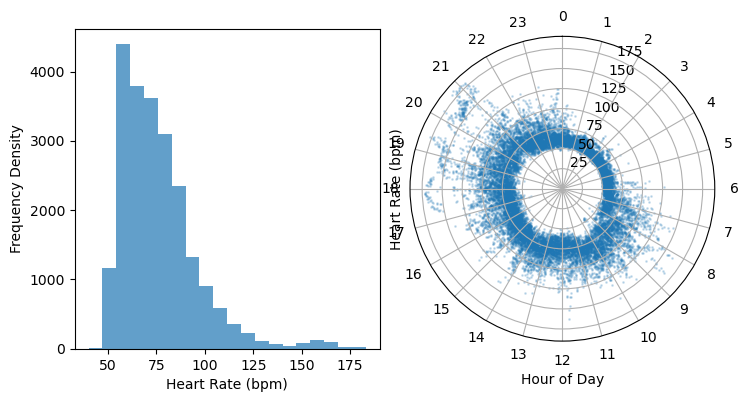

In [17]:
fig = plt.figure(figsize=(8, 4))
gs = fig.add_gridspec(nrows=1, ncols=2,  width_ratios=(1, 1), height_ratios=(1,),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.1, hspace=0.05)

hist_ax = fig.add_subplot(gs[0, 0])
circadian_ax = fig.add_subplot(gs[0, 1], projection = "polar")

ax = circadian_ax
ax.scatter(theta, r, 1, alpha = 0.2)
ax.set(xticks = np.linspace(0,2*np.pi,24,endpoint=False), xticklabels = range(0,24))
ax.grid(True)
ax.set(xlabel = "Hour of Day", ylabel = "Heart Rate (bpm)")
ax.set_theta_direction("clockwise")
ax.set_theta_zero_location("N")

ax = hist_ax
ax.hist(hr, bins = 20, alpha = 0.7);
ax.set(xlabel = "Heart Rate (bpm)", ylabel = "Frequency Density")